In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load excel file
df = pd.read_excel("sample_data.xlsx")
df.head()

,ID,Date,Region,Product,Category,Sales,Quantity,Payment Method,Price_per_Unit
0,1,2021-01-01,East,Product C,Category 3,759,13,Credit,58.384615
1,2,2021-01-02,West,Product B,Category 3,863,19,Online,45.421053
2,3,2021-01-03,North,Product B,Category 1,1054,22,Online,47.909091
3,4,2021-01-04,East,Product D,Category 1,502,8,Online,62.750000
4,5,2021-01-05,East,Product B,Category 2,1469,2,Cash,734.500000


In [3]:
# Overview
print("🔹 Dataset Overview:")
print(df.info())


# Checking Missing Values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              100 non-null    int64         
 1   Date            100 non-null    datetime64[ns]
 2   Region          100 non-null    object        
 3   Product         100 non-null    object        
 4   Category        100 non-null    object        
 5   Sales           100 non-null    int64         
 6   Quantity        100 non-null    int64         
 7   Payment Method  100 non-null    object        
 8   Price_per_Unit  100 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 7.2+ KB
None

🔹 Missing Values:
ID                0
Date              0
Region            0
Product           0
Category          0
Sales             0
Quantity          0
Payment Method    0
Price_per_Unit    0
dtype: int64


In [4]:
# Numerical and Categorical Columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include="object").columns
print("🔹 Numerical Features:", num_cols)
print("🔹 Categorical Features:", cat_cols)

🔹 Numerical Features: Index(['ID', 'Sales', 'Quantity', 'Price_per_Unit'], dtype='object')
🔹 Categorical Features: Index(['Region', 'Product', 'Category', 'Payment Method'], dtype='object')


### Data Aggregation

In [5]:
# Aggregating Numerical Columns

result = {}
for col in num_cols:
    result[col] = {
        "Sum": f"{df[col].sum().item():.2f}",
        "Mean": f"{df[col].mean().item():.2f}",
        "Median": f"{df[col].median().item():.2f}",
        "Max": df[col].max().item(),
        "Min": df[col].min().item(),
        "Std": f"{df[col].std().item():.2f}"
    }

print("\n🔹 Numerical Columns Aggregation:")
print(result)



🔹 Numerical Columns Aggregation:
{'ID': {'Sum': '5050.00', 'Mean': '50.50', 'Median': '50.50', 'Max': 100, 'Min': 1, 'Std': '29.01'}, 'Sales': {'Sum': '102912.00', 'Mean': '1029.12', 'Median': '1020.50', 'Max': 1984, 'Min': 101, 'Std': '551.15'}, 'Quantity': {'Sum': '1247.00', 'Mean': '12.47', 'Median': '13.00', 'Max': 24, 'Min': 1, 'Std': '7.43'}, 'Price_per_Unit': {'Sum': '15684.37', 'Mean': '156.84', 'Median': '81.13', 'Max': 963.0, 'Min': 6.0, 'Std': '195.99'}}


In [6]:
# Be simple

result = df[num_cols].agg(["sum", "mean", "median", "max", "min", "std"]).round(2).to_dict()

print("\n🔹 Numerical Columns Aggregation:")
print(result)


🔹 Numerical Columns Aggregation:
{'ID': {'sum': 5050.0, 'mean': 50.5, 'median': 50.5, 'max': 100.0, 'min': 1.0, 'std': 29.01}, 'Sales': {'sum': 102912.0, 'mean': 1029.12, 'median': 1020.5, 'max': 1984.0, 'min': 101.0, 'std': 551.15}, 'Quantity': {'sum': 1247.0, 'mean': 12.47, 'median': 13.0, 'max': 24.0, 'min': 1.0, 'std': 7.43}, 'Price_per_Unit': {'sum': 15684.37, 'mean': 156.84, 'median': 81.13, 'max': 963.0, 'min': 6.0, 'std': 195.99}}


In [7]:
# value_counts() for Categorical Columns

result = {}
for col in cat_cols:
    result[col] = {
        "Value Count": df[col].value_counts().to_dict()
    }

print("\n🔹 Categorical Value:")
print(result)


🔹 Categorical Value:
{'Region': {'Value Count': {'West': 30, 'South': 26, 'East': 24, 'North': 20}}, 'Product': {'Value Count': {'Product C': 30, 'Product A': 26, 'Product D': 24, 'Product B': 20}}, 'Category': {'Value Count': {'Category 1': 36, 'Category 3': 33, 'Category 2': 31}}, 'Payment Method': {'Value Count': {'Cash': 37, 'Credit': 35, 'Online': 28}}}


### Visualization

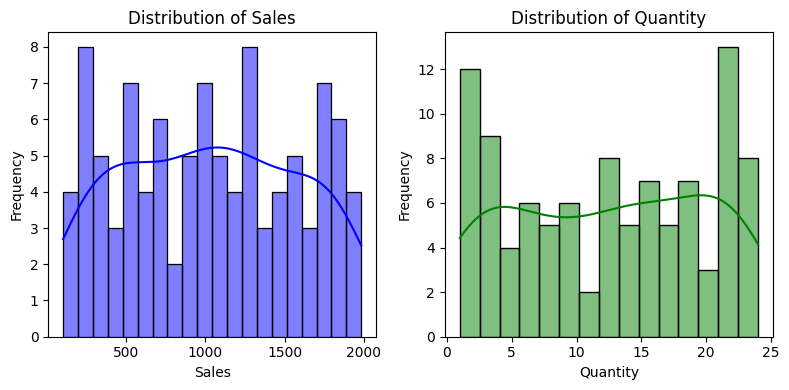

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Histogram for Sales
sns.histplot(df["Sales"], bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Distribution of Sales")
axes[0].set_xlabel("Sales")
axes[0].set_ylabel("Frequency")

# Histogram for Quantity
sns.histplot(df["Quantity"], bins=15, kde=True, color="green", ax=axes[1])
axes[1].set_title("Distribution of Quantity")
axes[1].set_xlabel("Quantity")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

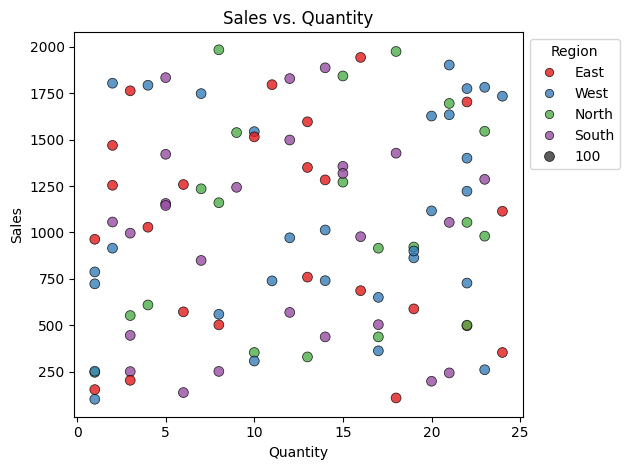

In [9]:
# Scatter Plot: Sales vs. Quantity

sns.scatterplot(
    data=df, 
    x="Quantity", 
    y="Sales", 
    hue="Region", 
    size=100, 
    sizes=(50, 200), 
    palette="Set1", 
    edgecolor="black", 
    alpha=0.8
)

plt.legend(title="Region", loc="upper left", bbox_to_anchor=(1, 1))
plt.title("Sales vs. Quantity")
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

/var/folders/ft/p10mlxys1rb172l0dzh4j6w40000gn/T/ipykernel_45255/2862388880.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Region", y="Sales", palette="coolwarm")


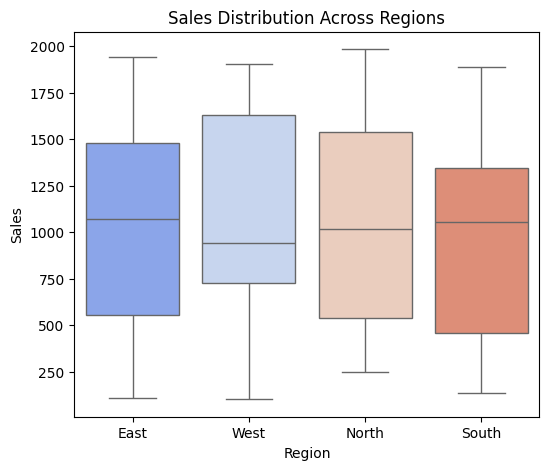

In [10]:
# Box Plot: Sales distribution across Regions

plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x="Region", y="Sales", palette="coolwarm")
plt.title("Sales Distribution Across Regions")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

/var/folders/ft/p10mlxys1rb172l0dzh4j6w40000gn/T/ipykernel_45255/2729792564.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x="Payment Method", y="Sales", palette="husl")


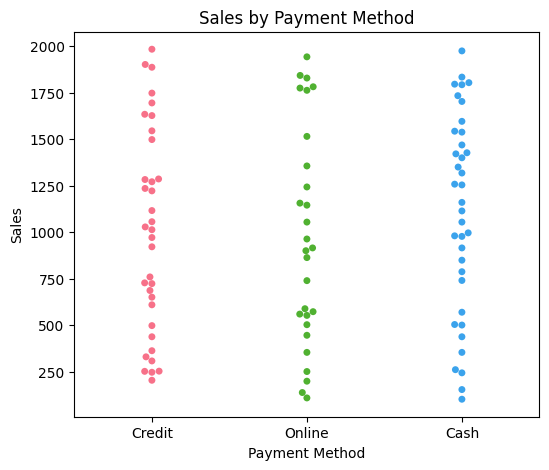

In [11]:
# Swarm Plot: Payment Method vs. Sales

plt.figure(figsize=(6, 5))
sns.swarmplot(data=df, x="Payment Method", y="Sales", palette="husl")
plt.title("Sales by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Sales")
plt.show()

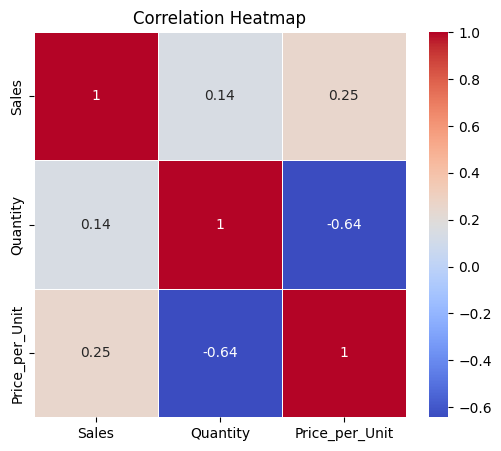

In [13]:
# Heatmap: Correlation Matrix

plt.figure(figsize=(6, 5))
sns.heatmap(df[["Sales", "Quantity", "Price_per_Unit"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Data Aggregation (Group by)

In [14]:
# Multiple aggregations by Region

aggregation = {
    "Sales": ["sum", "mean", "max", "min"],
    "Quantity": ["sum", "mean"]
    }

region_aggs = df.groupby("Region").agg(aggregation)

print("\n--- Region Aggregations (Sales & Quantity) ---")
print(region_aggs)


--- Region Aggregations (Sales & Quantity) ---
        Sales                         Quantity           
          sum         mean   max  min      sum       mean
Region                                                   
East    24456  1019.000000  1943  108      271  11.291667
North   21142  1057.100000  1984  246      275  13.750000
South   25365   975.576923  1887  137      291  11.192308
West    31949  1064.966667  1902  101      410  13.666667


In [15]:
# Sales by Payment Method

payment_sales = df.groupby("Payment Method")["Sales"].agg(["sum", "mean", "count"])

print("\n--- Sales by Payment Method ---")
print(payment_sales)


--- Sales by Payment Method ---
                  sum         mean  count
Payment Method                           
Cash            40904  1105.513514     37
Credit          34960   998.857143     35
Online          27048   966.000000     28


In [16]:
# Group by two columns (Region and Product) with sum of Sales

region_product_sales = df.groupby(["Region", "Product"])["Sales"].sum()

print("\n--- Sales by Region and Product ---")
print(region_product_sales)


--- Sales by Region and Product ---
Region  Product  
East    Product A    10971
        Product B     5791
        Product C     3107
        Product D     4587
North   Product A     3423
        Product B     3760
        Product C     4894
        Product D     9065
South   Product A     5162
        Product B     8165
        Product C     6571
        Product D     5467
West    Product A     3209
        Product B     4985
        Product C    14965
        Product D     8790
Name: Sales, dtype: int64


In [17]:
# Pivot table view (sum of Sales by Region & Category)

sales_pivot = pd.pivot_table(
    df,
    index="Category",
    columns="Region",
    values="Sales",
    aggfunc="sum"
)

print("\n--- Pivot Table: Sum of Sales by Region & Category ---")
print(sales_pivot)


--- Pivot Table: Sum of Sales by Region & Category ---
Region       East  North  South   West
Category                              
Category 1  11433  10896   8108   7949
Category 2   4318   3025   6759  17263
Category 3   8705   7221  10498   6737


### Visualization (Group by)

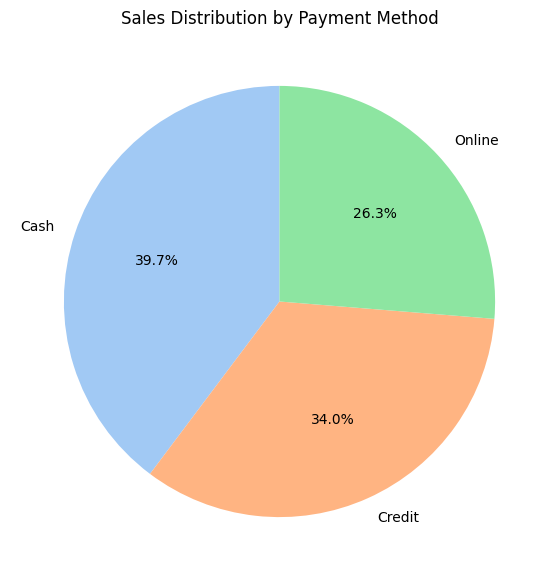

In [21]:
# Pie Chart: Sales by Payment Method

plt.figure(figsize=(7, 7))
plt.pie(payment_sales["sum"], labels=payment_sales.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Sales Distribution by Payment Method")
plt.show()

<Figure size 1000x600 with 0 Axes>

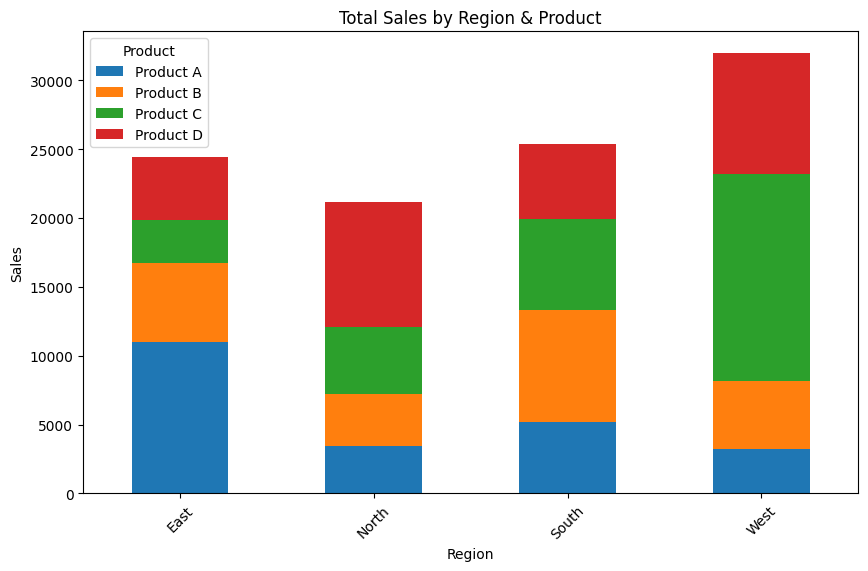

In [19]:
# Stacked Bar Chart: Group by Region & Product Sales

plt.figure(figsize=(10, 6))
region_product_sales.unstack().plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Total Sales by Region & Product")
plt.ylabel("Sales")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.legend(title="Product")
plt.show()

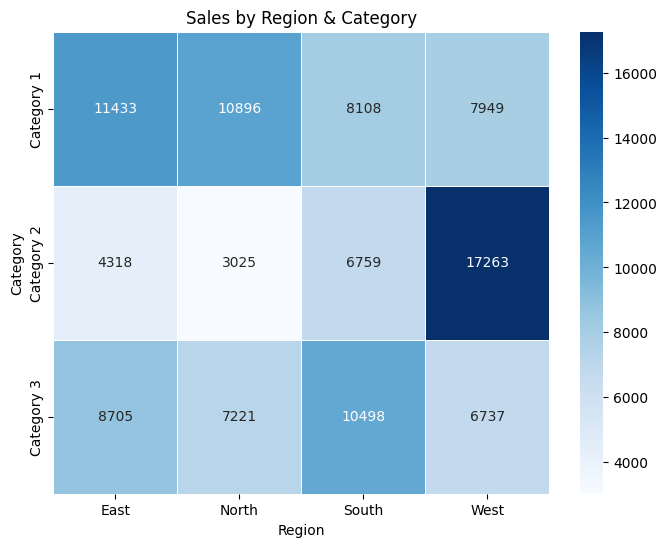

In [20]:
# Heatmap: Sales Pivot Table (Sales by Region & Category)

plt.figure(figsize=(8, 6))
sns.heatmap(sales_pivot, annot=True, fmt=".0f", cmap="Blues", linewidths=0.5)
plt.title("Sales by Region & Category")
plt.xlabel("Region")
plt.ylabel("Category")
plt.show()